# Guided Project: Predicting Bike Rentals
Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

## Introdutction to the Data set
Here are the descriptions for the relevant columns:

- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

In this project, you'll try to predict the total number of bikes people rented in a given hour. You'll predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, you'll create a few different machine learning models and evaluate their performance.

### Tasks
- Use the pandas library to read bike_rental_hour.csv into the dataframe bike_rentals.
- Print out the first few rows of bike_rentals and take a look at the data.
- Make a histogram of the cnt column of bike_rentals, and take a look at the distribution of total rentals.
- Use the corr method on the bike_rentals dataframe to explore how each column is correlated with cnt.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")

In [3]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


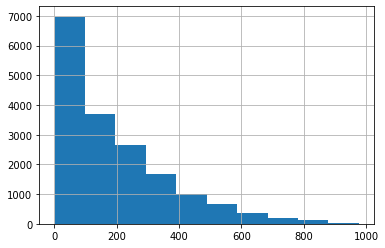

In [4]:
bike_rentals.cnt.hist()
plt.show()

In [5]:
corr = bike_rentals.corr()
corr

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


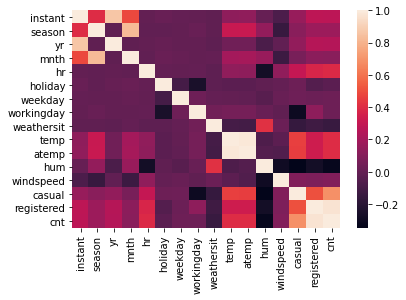

In [6]:
sns.heatmap(corr)
plt.show()

## Calculating Features
It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information, or distilling existing information.

For example, the hr column in bike_rentals contains the hours during which bikes are rented, from 1 to 24. A machine will treat each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This will bundle similar times together, enabling the model to make better decisions.

### Tasks
- Write a function called assign_label that takes in a numeric value for an hour, and returns:
  - 1 if the hour is from 6 to 12
  - 2 if the hour is from 12 to 18
  - 3 if the hour is from 18 to 24
  - 4 if the hour is from 0 to 6
- Use the apply method on series objects to apply the function to each item in the hr column.
- Assign the result to the time_label column of bike_rentals.

In [7]:
def assign_label(hr):
    if 6 <= hr < 12:
        return 1
    elif 12 <= hr <18:
        return 2
    elif 18 <= hr <24:
        return 3
    else:
        return 4

In [8]:
bike_rentals["time_label"] = bike_rentals.hr.apply(assign_label)

In [9]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [10]:
bike_rentals.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,3
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,3
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,3
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,3
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49,3


## Splitting the Data into Train and Test Sets
Before you can begin applying machine learning algorithms, you'll need to split the data into training and testing sets. This will enable you to train an algorithm using the training set, and evaluate its accuracy on the testing set. If you train an algorithm on the training data, then evaluate its performance on the same data, you can get an unrealistically low error value, due to overfitting.

### Tasks
- Based on your explorations of the cnt column, pick an error metric you want to use to evaluate the performance of the machine learning algorithms. Explain why you chose this metric in a markdown cell.
- Select 80% of the rows in bike_rentals to be part of the training set using the sample method on bike_rentals. Assign the result to train.
- Select the rows that are in bike_rentals but not in train to be in the testing set. Assign the result to test.
  - This line will generate a Boolean series that's False when a row in bike_rentals isn't found in train: bike_rentals.index.isin(train.index)
  - This line will select any rows in bike_rentals that aren't found in train to be in the testing set: `bike_rentals.loc[~bike_rentals.index.isin(train.index)]`

In [25]:
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [48]:
target = bike_rentals.cnt
features = bike_rentals.drop("cnt", axis=1)

In [13]:
print("target: ", target.shape)
print("features: ", features.shape)

target:  (17379,)
features:  (17379, 17)


In [14]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=.2, shuffle=True)

In [15]:
print("Train Features: ",train_features.shape)
print("Test Features: ", test_features.shape)
print("Train Target: ", train_target.shape)
print("Test Target: ", test_target.shape)

Train Features:  (13903, 17)
Test Features:  (3476, 17)
Train Target:  (13903,)
Test Target:  (3476,)


## Applying Linear Regression
Now that you've done some exploration and manipulation, you're ready to apply linear regression to the data. Linear regression will probably work fairly well on this data, given that many of the columns are highly correlated with cnt.

As you learned in earlier missions, linear regression works best when predictors are linearly correlated to the target and also independent -- in other words, they don't change meaning when we combine them with each other. The good thing about linear regression is that it's fairly resistant to overfitting because it's straightforward. It also can be prone to underfitting the data, however, and not building a powerful enough model. This means that linear regression usually isn't the most accurate option.

You'll need to ignore the casual and registered columns because cnt is derived from them. If you're trying to predict the number of people who rent bikes in a given hour (cnt), it doesn't make sense that you'd already know casual or registered, because those numbers are added together to get cnt.

### Tasks
- Create a list of predictor columns to use in training and predictions.
  - At a minimum, this list should exclude the cnt, casual, dteday, and registered columns.
  - Feel free to remove other columns you don't think will be useful for the predictions.
- Use the LinearRegression class from sklearn to train a machine learning algorithm on train.
  - Use only the columns in the list of predictors for this.
- Make predictions using the LinearRegression class on test.
  - Use the exact same predictor columns here.
- Calculate the error between the predictions and the actual values.

In [16]:
cols_to_drop = ["casual","dteday","registered"]
train_features = train_features.drop(cols_to_drop, axis=1)
test_features = test_features.drop(cols_to_drop, axis=1)

In [17]:
print("Train Features: ",train_features.shape)
print("Test Features: ", test_features.shape)
print("Train Target: ", train_target.shape)
print("Test Target: ", test_target.shape)

Train Features:  (13903, 14)
Test Features:  (3476, 14)
Train Target:  (13903,)
Test Target:  (3476,)


In [24]:
lr = LinearRegression()
lr.fit(train_features, train_target)
prediction = lr.predict(test_features)

In [27]:
rmse = mean_squared_error(test_target, prediction, squared=False)
print("RMSE: ",rmse)

RMSE:  131.42392446280573


## Applying Decision Trees
Now you're ready to apply the decision tree algorithm. You'll be able to compare its error with the error from linear regression, which will enable you to pick the right algorithm for this data set.

Decision trees tend to predict outcomes much more reliably than linear regression models. Because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

### Tasks
- Use the DecisionTreeRegressor class to fit a decision tree algorithm to the train data.
- Make predictions using the DecisionTreeRegressor class on test.
- Calculate the error between the predictions and the actual values.
- Experiment with various parameters of the DecisionTreeRegressor class, including min_samples_leaf, to see if it changes the error.
- Write your thoughts on the predictions and the error in a markdown cell.

In [49]:
dt = DecisionTreeRegressor(min_samples_leaf=10, max_depth=20)
dt.fit(train_features, train_target)
prediction_tree = dt.predict(test_features)
train_pred= dt.predict(train_features)

In [50]:
rmse_tree = mean_squared_error(test_target, prediction_tree)
print(rmse_tree)

2683.7629818895753


## Applying Random Forests
You can now apply the random forest algorithm, which improves on the decision tree algorithm. Random forests tend to be much more accurate than simple models like linear regression. Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests can still be prone to overfitting, though, so it's important to tune parameters like maximum depth and minimum samples per leaf.

### Tasks
- Use the RandomForestRegressor class to fit a random forest algorithm to the train data.
- Make predictions using the RandomForestRegressor class on test.
- Calculate the error between the predictions and the actual values.
- Experiment with various parameters of the RandomForestRegressor class, including min_samples_leaf, to see if it changes the error.
- Write your thoughts on the predictions and the error in a markdown cell.

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor(n_estimators=10, min_samples_leaf=2)
rf.fit(train_features, train_target)
rf_pred = rf.predict(test_features)

In [53]:
rf_rsme = mean_squared_error(test_target, rf_pred)
print("RSME: ", rf_rsme)

RSME:  1846.2763664494612
